In [1]:
#While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering 
#some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that
#“The Empire Strikes Back” is clearly the best of the bunch?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [2]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
#Let's remove rows without a RespondentID.
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
#Let's examine the next two columns, first "Have they seen any of the SW movies" 
star_wars.iloc[:,1].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
#and "Are they a fan"?
star_wars.iloc[:,2].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
#Let's convert the answers into Boolean values.
star_wars.iloc[:,1] = star_wars.iloc[:,1].map({"Yes": True, "No": False})
star_wars.iloc[:,1].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars.iloc[:,2] = star_wars.iloc[:,2].map({"Yes": True, "No": False})
star_wars.iloc[:,2].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
#Renaming columns and converting values to Boolean.
list_of_sw_movies = ["Star Wars: Episode I  The Phantom Menace", "Star Wars: Episode II  Attack of the Clones", "Star Wars: Episode III  Revenge of the Sith", "Star Wars: Episode IV  A New Hope", "Star Wars: Episode V The Empire Strikes Back", "Star Wars: Episode VI Return of the Jedi"]
counter = 3
for movie in list_of_sw_movies:
    mapper = {movie: True, np.nan: False}
    star_wars.iloc[:,counter] = star_wars.iloc[:,counter].map(mapper)
    counter += 1

star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1","Unnamed: 4":"seen_2","Unnamed: 5":"seen_3","Unnamed: 6":"seen_4","Unnamed: 7":"seen_5","Unnamed: 8":"seen_6"})    
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [10]:
#Now let's clean up the columns pertaining to how people rank the movies.
#First, we need to convert the data to a numeric format to facilitate our calculations.
#Next, we'll clean the column names, as was shown in the preceeding cell.
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)
star_wars = star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1","Unnamed: 10":"ranking_2","Unnamed: 11":"ranking_3","Unnamed: 12":"ranking_4","Unnamed: 13":"ranking_5","Unnamed: 14":"ranking_6"})    
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


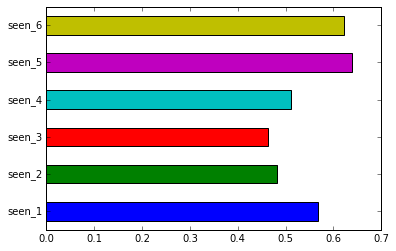

In [11]:
#Now that we've cleaned up the dataframe, let's first look into which movie was the most popular by viewership...
mean_star_wars = star_wars.mean()
mean_star_wars[3:9].plot(kind="barh")
plt.show()

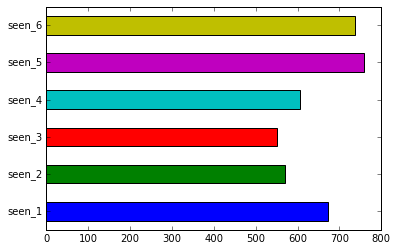

In [12]:
#... and in terms of absolute viewership
sum_star_wars = star_wars.sum()
sum_star_wars[3:9].plot(kind="barh")
plt.show()

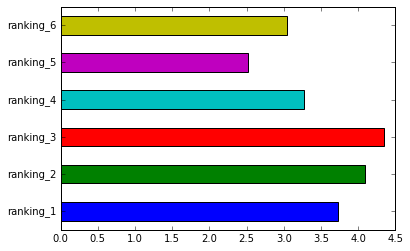

In [13]:
#Now let's find out which movie was the most popular, 
#Here, people were asked to rate the movies on a scale from 1 (the best) to 6 (the worst)
mean_star_wars[9:15].plot(kind="barh")
plt.show()

In [14]:
#From the graphs its evident that there is a correlation between having seen the movie and liking it (perhaps unsurprisngly).
#The questionaire also included questions such as the respondents gender and whether or not they considered themselves to be
#fans of the Star Wars franchise, among others.
#Let's see if there is a difference between the genders!
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

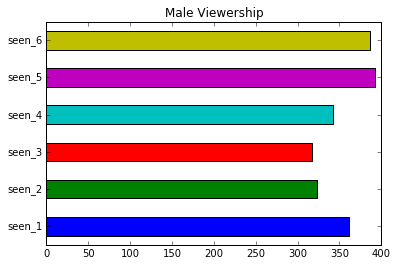

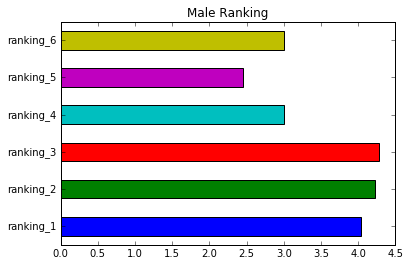

In [15]:
sum_males = males.sum()
sum_males[3:9].plot(kind="barh",title="Male Viewership")
plt.show()
mean_males = males.mean()
mean_males[9:15].plot(kind="barh",title="Male Ranking")
plt.show()

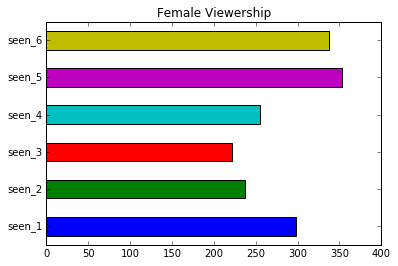

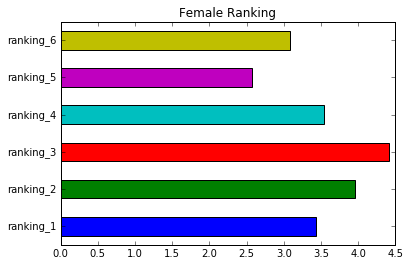

In [16]:
sum_females = females.sum()
sum_females[3:9].plot(kind="barh",title="Female Viewership")
plt.show()
mean_females = females.mean()
mean_females[9:15].plot(kind="barh",title="Female Ranking")
plt.show()

In [17]:
#Comparing the male and female viewership rankings we can see that fewer females have seen the new (1,2,3) movies
#...compared to the men. Interestingly, females liked movie 1 and 2 better than the men, perhaps because the new movies
#...have a romance subplot between Anakin and Padme?

In [18]:
#Let's see if there is a difference between those who consider themselves fans and those who don't.
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

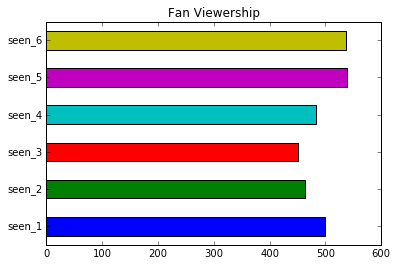

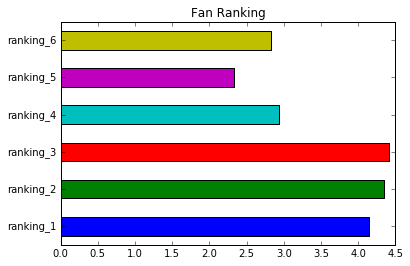

In [21]:
sum_fans = fans.sum()
sum_fans[3:9].plot(kind="barh",title="Fan Viewership")
plt.show()
mean_fans = fans.mean()
mean_fans[9:15].plot(kind="barh",title="Fan Ranking")
plt.show()

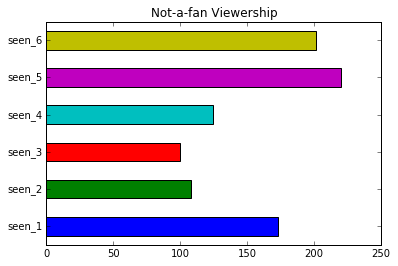

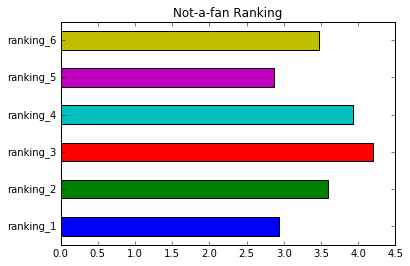

In [22]:
sum_not_fans = not_fans.sum()
sum_not_fans[3:9].plot(kind="barh",title="Not-a-fan Viewership")
plt.show()
mean_not_fans = not_fans.mean()
mean_not_fans[9:15].plot(kind="barh",title="Not-a-fan Ranking")
plt.show()

In [ ]:
#The biggest surprise here is that people who do not consider themselves fans of the Star Wars franchise ranked 
#movie 1 as their favourite, while the movie only recieved 